# Cluster Analysis for Chacón et al Dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('../data/processed/data_q3_cleaned.csv')

In [73]:
data.head()

,Country,Income_group,VA,PS,GE,RQ,RL,CR,Num of Students in Top 1000 Universities,Percentage(%),Top200,Top201-500,Top501-800,Top801-1000,Number in tertiary education,Tertiary Education Age Population,Tertiary Percentage,ISCED5,ISCED6,ISCED7,ISCED8,TL,TLID,TLAp,TLRd
0,Argentina,Upper middle income,59.11,45.89,50.98,25.59,33.33,43.33,536958.0,16.155881,3.53,1.17,3.81,7.64,3323607.0,3482116.0,92.107127,18.10,68.24,8.37,0.74,47.5,48.0,51.0,47.5
1,Australia,High income,94.23,80.29,93.88,96.60,95.22,94.23,808734.0,45.069809,16.88,20.18,5.03,2.98,1794403.0,1547539.0,83.050766,25.41,65.59,21.33,3.62,15.0,30.0,17.0,5.5
2,Austria,High income,93.60,89.10,93.10,91.71,97.18,92.47,129451.0,30.599529,12.06,9.80,8.74,0.00,423049.0,489212.0,71.220253,15.08,40.31,27.13,3.96,4.0,3.5,13.0,14.0
3,Belgium,High income,93.03,73.91,92.34,87.25,88.94,90.40,187459.0,36.104520,22.65,12.09,1.37,0.00,519212.0,647896.0,72.090119,3.40,58.11,16.00,2.63,12.5,8.0,16.5,18.0
4,Brazil,Upper middle income,62.07,36.97,50.71,54.55,46.50,56.46,738221.0,8.296570,1.09,1.63,2.79,2.79,8897906.0,16138018.0,55.001197,0.00,53.31,1.08,0.73,58.5,50.5,48.0,61.5


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   59 non-null     object 
 1   Income_group                              59 non-null     object 
 2   VA                                        59 non-null     float64
 3   PS                                        59 non-null     float64
 4   GE                                        59 non-null     float64
 5   RQ                                        59 non-null     float64
 6   RL                                        59 non-null     float64
 7   CR                                        59 non-null     float64
 8   Num of Students in Top 1000 Universities  59 non-null     float64
 9   Percentage(%)                             59 non-null     float64
 10  Top200                                  

In [75]:
# Standardizing the data

# Drop non-numeric columns and scale the data
X = data.copy()
X.drop(columns=["Country", "Income_group"], inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

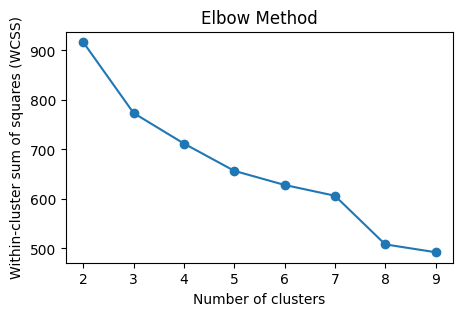

In [76]:
#Elbow Method for Cluster Selection
wcss = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(5, 3))
plt.plot(K, wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.show()

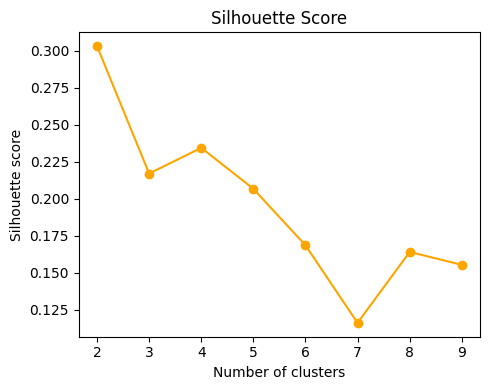

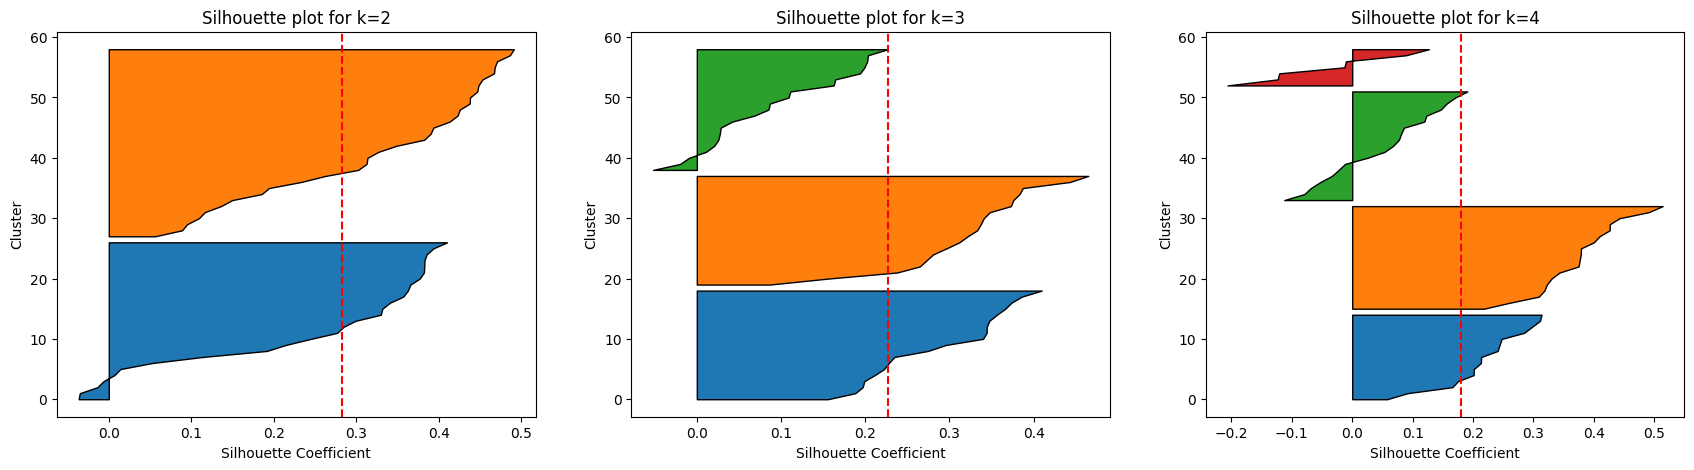

In [77]:
# Silhouette Score and Plot for Cluster Selection
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Silhouette score line plot
plt.figure(figsize=(5, 4))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.tight_layout()


#Silhouette plot for selected k (e.g., k = 3)
def silhouette_plot(X, k):
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    sil_vals = silhouette_samples(X, labels)
    y_lower = 0
    colors = sns.color_palette("tab10", k)

    for i, color in enumerate(colors):
        vals = np.sort(sil_vals[labels == i])
        plt.fill_betweenx(range(y_lower, y_lower + len(vals)), 0, vals, color=color, edgecolor="black")
        y_lower += len(vals)

    plt.axvline(silhouette_score(X, labels), color="red", linestyle="--")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster")
    plt.title(f"Silhouette plot for k={k}")


plt.figure(figsize=(21, 5))

# Silhouette plot for k=2
plt.subplot(1, 3, 1)
silhouette_plot(X_scaled, k=2)

# Silhouette plot for k=3
plt.subplot(1, 3, 2)
silhouette_plot(X_scaled, k=3)

# Silhouette plot for k=4
plt.subplot(1, 3, 3)
silhouette_plot(X_scaled, k=4)
plt.show()

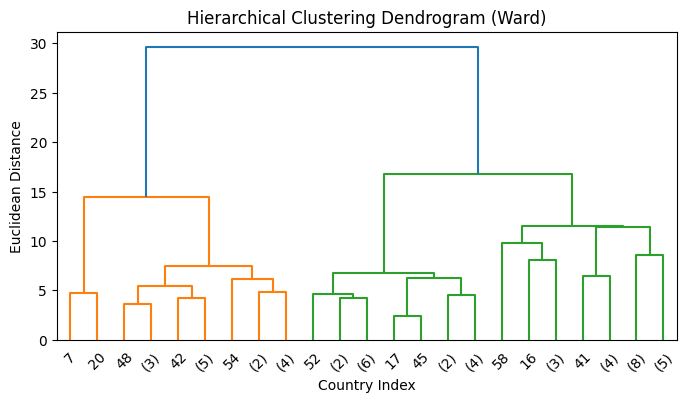

In [78]:
#Dendrogram for Hierarchical Clustering

# Perform linkage using Ward's method
linkage_matrix = linkage(X_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Country Index")
plt.ylabel("Euclidean Distance")
plt.show()


### Comment

- **Elbow method** suggests k = 3, as the curve flattens at 3 clusters
- **Silhouette score** suggests k = 2, however k = 3 and k = 4 also have relatively high silhouette score
- **Silhouette plots** show:
  - **k = 2**: Clear and well-separated clusters
  - **k = 3**: Balanced and reasonably well-formed clusters
  - **k = 4**: One small cluster with poor cohesion (many negative values)
- **Hierarchical Clustering Dendrogram** supports 3 clusters, with the largest vertical linkage jump just before 3 splits.

Therefore, proceeding with 3 clusters is well-supported by all three methods.

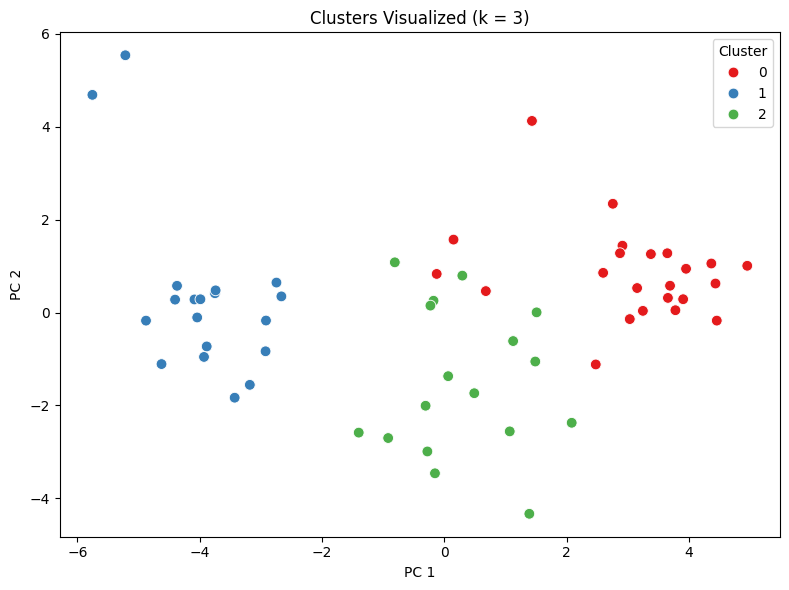

In [79]:
# Visualizing Clusters with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set1", s=60)
plt.title("Clusters Visualized (k = 3)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

### 3c. Comment
- Clusters are **clearly separated** in PCA space with **minimal overlap**.
- Blue and red clusters are compact, indicating strong cohesion.
- Green cluster is more spread out, suggesting higher internal variance.


## 3d. Report

### **Performance of the Cluster Analysis**
- The **Elbow method** suggested **k = 3**, showing a clear drop in WCSS before flattening out.
- The **Silhouette score** peaked at **k = 2**; however, **k = 3** still had a relatively high score.
- The **Silhouette plot** showed good cohesion and separation for **k = 3**.
- The **Hierarchical dendrogram** supported k = 3, with the largest vertical merge distance before 3 clusters.

### **Description/Characterization of Clusters**
- The three clusters are **reasonably well-separated**, especially along **PC1**.
- The **blue cluster** is more compact and completely separated from the green and red clusters, showing strong cohesion.
- The **green cluster** is the most spread out along both **PC1 and PC2**.
- The **red cluster** is relatively compact, but has **minimal overlap** with the green cluster.

### **Anomalies**
- The **blue cluster** contains **two isolated data points** in the upper-left quadrant, far from the main cluster — possibly due to outliers in the dataset.
- The **red cluster** also has a **single data point** positioned noticeably away from its cluster core.
- The **silhouette plot for k = 3** supports this, showing a few **negative or low silhouette coefficients**, indicating these points may be **borderline or misclustered**.

### **Recommendation for Additional Variables**
- Clustering was based solely on **standardized numerical variables**, excluding contextual fields like **Country** and **Income_group**, which may improve cluster interpretation post-analysis.
- Other relevant variables such as **GDP per capita** could provide **economic context**, helping to explain the distribution and structure of clusters more effectively.
